In [2]:
import pystac

In [3]:
items=pystac.ItemCollection.from_file("results/search.json")

In [4]:
len(items)

4

In [5]:
assets=items[1].assets

In [6]:
assets.keys()

dict_keys(['overview', 'thumbnail', 'metadata', 'B11', 'B01', 'B12', 'B02', 'B03', 'B04', 'AOT', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'WVP', 'visual', 'SCL', 'info'])

In [7]:
for (key,asset) in assets.items():
    print(key,":",asset.title)

overview : True color image
thumbnail : Thumbnail
metadata : Original XML metadata
B11 : Band 11 (swir16)
B01 : Band 1 (coastal)
B12 : Band 12 (swir22)
B02 : Band 2 (blue)
B03 : Band 3 (green)
B04 : Band 4 (red)
AOT : Aerosol Optical Thickness (AOT)
B05 : Band 5
B06 : Band 6
B07 : Band 7
B08 : Band 8 (nir)
B8A : Band 8A
B09 : Band 9
WVP : Water Vapour (WVP)
visual : True color image
SCL : Scene Classification Map (SCL)
info : Original JSON metadata


In [8]:
#getting the items required to compute NDVI (vegetation index)

red_href=assets["B04"].href
nir_href=assets["B08"].href


In [9]:
red_href


'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2B_31UFU_20200326_0_L2A/B04.tif'

In [12]:
import rioxarray

In [15]:
red=rioxarray.open_rasterio(red_href,masked=True)
nir=rioxarray.open_rasterio(nir_href,masked=True)

In [16]:
red

<xarray.DataArray (band: 1, y: 10980, x: 10980)>
[120560400 values with dtype=float32]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 6e+05 6e+05 6e+05 ... 7.098e+05 7.098e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    scale_factor:        1.0
    add_offset:          0.0

In [17]:
bbox = (629_000, 5_804_000, 639_000, 5_814_000)


In [19]:
red.coords["x"].min()

<xarray.DataArray 'x' ()>
array(600005.)
Coordinates:
    spatial_ref  int32 0

In [20]:
red.rio.crs


CRS.from_epsg(32631)

In [21]:
red_clip=red.rio.clip_box?

Signature:
red.rio.clip_box(
    minx: float,
    miny: float,
    maxx: float,
    maxy: float,
    auto_expand: Union[bool, int] = False,
    auto_expand_limit: int = 3,
    crs: Optional[Any] = None,
) -> xarray.core.dataarray.DataArray
Docstring:
Clip the :obj:`xarray.DataArray` by a bounding box.

.. versionadded:: 0.12 crs

Parameters
----------
minx: float
    Minimum bound for x coordinate.
miny: float
    Minimum bound for y coordinate.
maxx: float
    Maximum bound for x coordinate.
maxy: float
    Maximum bound for y coordinate.
auto_expand: Union[bool, int]
    If True, it will expand clip search if only 1D raster found with clip.
auto_expand_limit: int
    maximum number of times the clip will be retried before raising
    an exception.
crs: :obj:`rasterio.crs.CRS`, optional
    The CRS of the bounding box. Default is to assume it is the same
    as the dataset.

Returns
-------
xarray.DataArray:
    The clipped object.
File:      c:\users\pirouz\anaconda3\envs\geospatial\

In [23]:
red_clip=red.rio.clip_box(*bbox)#unpacking the bbox as for the arguments of the clip_box function

In [24]:
nir_clip=nir.rio.clip_box(*bbox)

In [25]:
red_clip

<xarray.DataArray (band: 1, y: 1000, x: 1000)>
[1000000 values with dtype=float32]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 6.29e+05 6.29e+05 6.29e+05 ... 6.39e+05 6.39e+05
  * y            (y) float64 5.814e+06 5.814e+06 ... 5.804e+06 5.804e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    scale_factor:        1.0
    add_offset:          0.0

In [27]:
red_overview=rioxarray.open_rasterio(red_href,overview_level=2)
red_overview

<xarray.DataArray (band: 1, y: 1373, x: 1373)>
[1885129 values with dtype=uint16]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

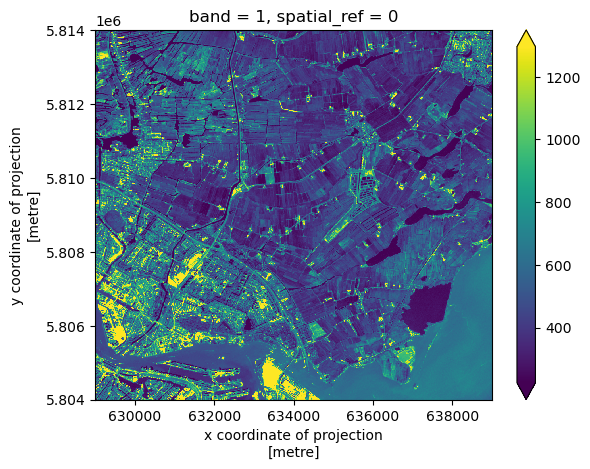

In [28]:
red_clip.plot(robust=True)

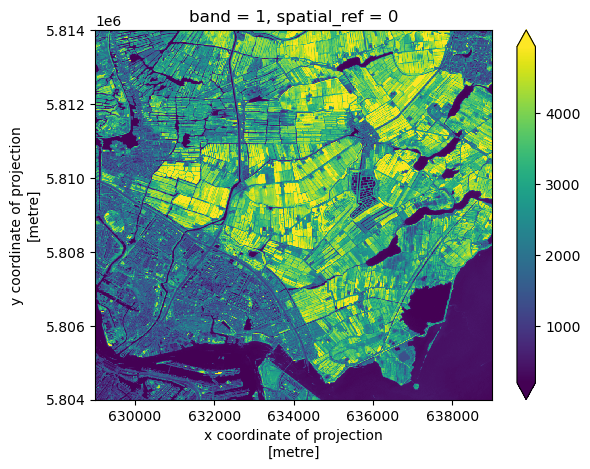

In [29]:
nir_clip.plot(robust=True)

In [33]:
red_clip.rio.crs,nir_clip.rio.crs

(CRS.from_epsg(32631), CRS.from_epsg(32631))

In [36]:
#if they happened to have different crs, we could use the following: (in this case absolutely unnecessary)
red_clip.rio.reproject_match(nir_clip)

<xarray.DataArray (band: 1, y: 1000, x: 1000)>
array([[[549., 447., 512., ..., 584., 402., 435.],
        [450., 476., 544., ..., 460., 409., 445.],
        [443., 550., 474., ..., 433., 422., 537.],
        ...,
        [830., 705., 306., ..., 591., 585., 580.],
        [843., 427., 192., ..., 586., 575., 587.],
        [636., 267., 153., ..., 577., 576., 568.]]], dtype=float32)
Coordinates:
  * x            (x) float64 6.29e+05 6.29e+05 6.29e+05 ... 6.39e+05 6.39e+05
  * y            (y) float64 5.814e+06 5.814e+06 ... 5.804e+06 5.804e+06
  * band         (band) int32 1
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    scale_factor:        1.0
    add_offset:          0.0

In [37]:
ndvi=(nir_clip-red_clip)/(nir_clip+red_clip)

In [38]:
ndvi

<xarray.DataArray (band: 1, y: 1000, x: 1000)>
array([[[ 0.65020704,  0.7989656 ,  0.7651376 , ...,  0.2565245 ,
          0.4478022 ,  0.49623623],
        [ 0.7705252 ,  0.78548896,  0.7269076 , ...,  0.3728698 ,
          0.5104728 ,  0.48405796],
        [ 0.77710694,  0.72959685,  0.70504045, ...,  0.48360166,
          0.5220838 ,  0.4706752 ],
        ...,
        [ 0.15132925,  0.14129111,  0.19685039, ..., -0.3728223 ,
         -0.33714285, -0.36953956],
        [ 0.14546376,  0.15193644,  0.15789473, ..., -0.35962877,
         -0.34502923, -0.36511627],
        [ 0.18618043, -0.03288201,  0.12571429, ..., -0.3544601 ,
         -0.35689047, -0.3443787 ]]], dtype=float32)
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 6.29e+05 6.29e+05 6.29e+05 ... 6.39e+05 6.39e+05
  * y            (y) float64 5.814e+06 5.814e+06 ... 5.804e+06 5.804e+06
    spatial_ref  int32 0

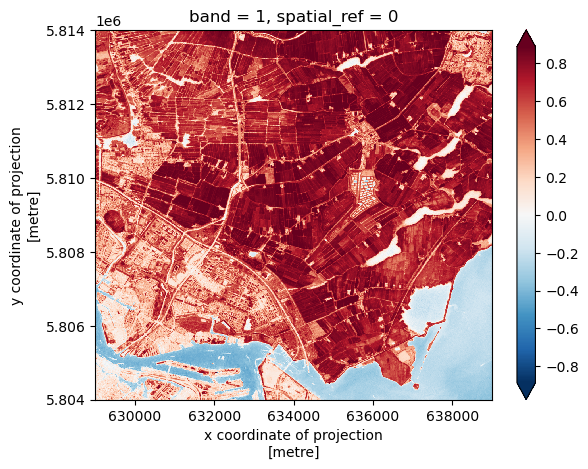

In [39]:
ndvi.plot(robust=True)

(array([4.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 5.00000e+00, 3.70000e+01, 1.16800e+03, 9.46300e+03,
        9.97200e+03, 1.04900e+04, 1.70760e+04, 2.09030e+04, 3.08960e+04,
        1.30130e+04, 5.67200e+03, 4.08300e+03, 3.89000e+03, 5.19400e+03,
        7.42100e+03, 1.18330e+04, 1.83560e+04, 2.01270e+04, 2.13730e+04,
        2.09520e+04, 2.13150e+04, 2.23650e+04, 2.29280e+04, 2.34750e+04,
        2.47120e+04, 2.67330e+04, 2.97430e+04, 3.48200e+04, 4.08790e+04,
        4.59290e+04, 4.99840e+04, 5.55330e+04, 6.74730e+04, 8.65400e+04,
        1.00257e+05, 8.64460e+04, 2.87080e+04, 2.21000e+02, 4.00000e+00]),
 array([-9.98356640e-01, -9.58400786e-01, -9.18444991e-01, -8.78489137e-01,
        -8.38533282e-01, -7.98577428e-01, -7.58621633e-01, -7.18665779e-01,
        -6.78709924e-01, -6.38754129e-01, -5.98798275e-01, -5.58842421e-01,
        -5.18886626e-01, -4.78930771e-01

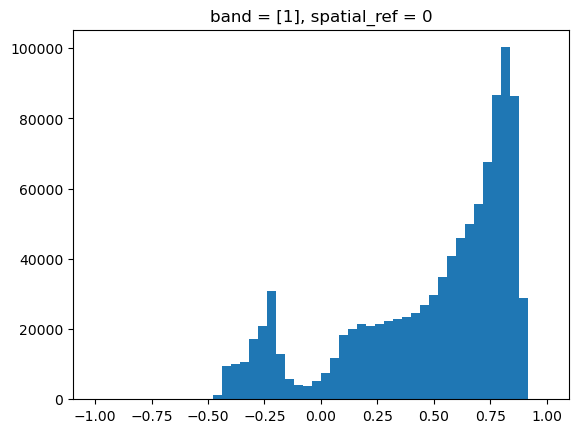

In [41]:
ndvi.plot.hist(bins=50)

In [44]:
print(ndvi.isnull().sum())

<xarray.DataArray ()>
array(4)
Coordinates:
    spatial_ref  int32 0


In [45]:
ndvi_interpolated=ndvi.interpolate_na(dim="x")

In [46]:
print(ndvi_interpolated.isnull().sum())

<xarray.DataArray ()>
array(0)
Coordinates:
    spatial_ref  int32 0
